# Homework 3
### Name: Yuhui Wang
### Collaborators: [Your collaborators]

Due date: May 19, 2024

Submission instructions: 
- __Autograder will not be used for scoring, but you still need to submit the python file converted from this notebook (.py) and the notebook file (.ipynb) to the code submission window.__ 
To convert a Jupyter Notebook (`.ipynb`) to a regular Python script (`.py`):
  - In Jupyter Notebook: File > Download as > Python (.py)
  - In JupyterLab: File > Save and Export Notebook As... > Executable Script
  - In VS Code Jupyter Notebook App: In the toolbar, there is an Export menu. Click on it, and select Python script.
- Submit `hw3.ipynb` and `hw3.py` on Gradescope under the window "Homework 3 - code". Do **NOT** change the file name.
- Convert this notebook into a pdf file and submit it on Gradescope under the window "Homework 3 - PDF". Make sure all your code and text outputs in the problems are visible. 


This homework requires two new packages, `pyarrow` and `duckdb`. Pleas make sure to install them in your `BIOSTAT203C-24S` environment:

```bash
conda activate BIOSTAT203C-24S
conda install -c conda-forge pyarrow python-duckdb
```


## Problem 1. 

Recall the simple random walk.  At each step, we flip a fair coin. If heads, we move "foward" one unit; if tails, we move "backward." 

### (A).

Way back in Homework 1, you wrote some code to simulate a random walk in Python. 

Start with this code. If you have since written random walk code that you prefer, you can use this instead. Regardless, take your code, modify it, and enclose it in a function `rw()`. This function should accept a single argument `n`, the length of the walk. The output should be a list giving the position of the random walker, starting with the position after the first step. For example, 

```python
rw(5)
[1, 2, 3, 2, 3]
```

Unlike in the HW1 problem, you should not use upper or lower bounds. The walk should always run for as long as the user-specified number of steps `n`. 

Use your function to print out the positions of a random walk of length `n = 10`. 

Don't forget a helpful docstring! 




In [10]:
import random

def rw(n):
    """
    Simulates a simple random walk of n steps.
    
    Args:
    n (int): The number of steps in the random walk.
    
    Returns:
    list: A list of integers representing the position of the random walker
          after each step, starting from position 0.
    """
    position = 0
    walk = []
    for _ in range(n):
        step = 1 if random.choice([True, False]) else -1
        position += step
        walk.append(position)
    return walk

In [11]:
rw(10)

[1, 2, 1, 2, 1, 0, -1, -2, -3, -4]

### (B). 

Now create a function called `rw2(n)`, where the argument `n` means the same thing that it did in Part A. Do so using `numpy` tools. Demonstrate your function as above, by creating a random walk of length 10. You can (and should) return your walk as a `numpy` array. 

**Requirements**: 

- No for-loops. 
- This function is simple enough to be implemented as a one-liner of fewer than 80 characters, using lambda notation. Even if you choose not to use lambda notation, the body of your function definition should be no more than three lines long. Importing `numpy` does not count as a line. 
- A docstring is required if and only if you take more than one line to define the function. 

**Hints**:

- Check the documentation for `np.random.choice()`. 
- `np.cumsum()`. 


In [12]:
import numpy as np

def rw2(n):
    """
    Generates a random walk of n steps using numpy.
    
    Args:
    n (int): The number of steps in the random walk.
    
    Returns:
    numpy.ndarray: An array of positions after each step.
    """
    steps = np.random.choice([-1, 1], size=n)
    return np.cumsum(steps)


In [13]:
rw2(10)

array([-1,  0, -1, -2, -1,  0, -1, -2, -3, -4])

### (C).
import timeit
Use the `%timeit` magic macro to compare the runtime of `rw()` and `rw2()`. Test how each function does in computing a random walk of length `n = 10000`. 

In [14]:
import timeit

rw_time = timeit.timeit('rw(10000)', globals=globals(), number=10)
rw2_time = timeit.timeit('rw2(10000)', globals=globals(), number=10)

print(f"Time taken by rw(): {rw_time} seconds")

Time taken by rw(): 0.03634925000369549 seconds
Time taken by rw2(): 0.000992374960333109 seconds


### (D). 

Write a few sentences in which you comment on (a) the performance of each function and (b) the ease of writing and reading each function. 

## Answer:
(a): It is clear that rw2() function is much faster than rw() function since numpy can optimize the operations.

(b): rw() is straightforward and it just uses basic python knowledge. It is easy to write with longer codes but hard to read.

rw2() may require knowledge of numpy package but it is simple to both write and read compared to rw().

### (E). 


In this problem, we will perform a `d`-dimensional random walk. There are many ways to define such a walk. Here's the definition we'll use for this problem: 

> At each timestep, the walker takes one random step forward or backward **in each of `d` directions.** 

For example, in a two-dimensional walk on a grid, in each timestep the walker would take a step either north or south, and then another step either east or west. Another way to think about is as the walker taking a single "diagonal" step either northeast, southeast, southwest, or northwest. 

Write a function called `rw_d(n,d)` that implements a `d`-dimensional random walk. `n` is again the number of steps that the walker should take, and `d` is the dimension of the walk. The output should be given as a `numpy` array of shape `(n,d)`, where the `k`th row of the array specifies the position of the walker after `k` steps. For example: 

```python
P = rw_d(5, 3)
P
```
```
array([[-1, -1, -1],
       [ 0, -2, -2],
       [-1, -3, -3],
       [-2, -2, -2],
       [-1, -3, -1]])
```

In this example, the third row `P[2,:] = [-1, -3, -3]` gives the position of the walk after 3 steps. 

Demonstrate your function by generating a 3d walk with 5 steps, as shown in the example above. 

All the same requirements and hints from Part B apply in this problem as well. It should be possible to solve this problem by making only a few small modifications to your solution from Part B. If you are finding that this is not possible, you may want to either (a) read the documentation for the relevant `numpy` functions more closely or (b) reconsider your Part B approach. 





In [15]:
def rw_d(n, d):
    """
    Simulates a d-dimensional random walk.

    Parameters:
    n (int): Number of steps in the random walk.
    d (int): Number of dimensions of the walk.

    Returns:
    np.ndarray: An array of shape (n, d) where each row represents the position
                of the walker after each step.
    """
    # Generate steps: -1 for backward, 1 for forward
    steps = np.random.choice([-1, 1], size=(n, d))
    # Compute cumulative sum to get the position after each step
    return np.cumsum(steps, axis=0)

In [16]:
rw_d(5, 3)

array([[-1,  1,  1],
       [ 0,  2,  2],
       [-1,  3,  3],
       [-2,  4,  2],
       [-1,  3,  3]])

### (F).

In a few sentences, describe how you would have solved Part E without `numpy` tools. Take a guess as to how many lines it would have taken you to define the appropriate function. Based on your findings in Parts C and D, how would you expect its performance to compare to your `numpy`-based function from Part E? Which approach would your recommend? 

Note: while I obviously prefer the `numpy` approach, it is reasonable and valid to prefer the "vanilla" way instead. Either way, you should be ready to justify your preference on the basis of writeability, readability, and performance. 

## Answer:
Without nummpy, we would use the approach as below:
1. initialize an empty list to store the random walk
2. for each step, create a new list to represent the current position
3. for each dimension, decide where to move randomly
4. update the current position
Roughly the code should be look like this:

In [17]:
def rw_d_vanilla(n, d):
    walk = []
    for step in range(n):
        current_position = [0] * d if step == 0 else walk[-1].copy()
        for dimension in range(d):
            current_position[dimension] += random.choice([-1, 1])
        walk.append(current_position)
    return walk

The performance of vanilla approach will be much slower than numpy approach. I would recommend to use numpy approach.
Compared to vanilla approach, numpy approach has better writeability, readability, and performance.

### (G).

Once you've implemented `rw_d()`, you can run the following code to generate a large random walk and visualize it. 

```python
from matplotlib import pyplot as plt

W = rw_d(20000, 2)
plt.plot(W[:,0], W[:,1])
```

You may be interested in looking at several other visualizations of multidimensional random walks [on Wikipedia](https://en.wikipedia.org/wiki/Random_walk). Your result in this part will not look exactly the same, but should look qualitatively fairly similar. 

You only need to show one plot. If you like, you might enjoy playing around with the plot settings. While `ax.plot()` is the normal method to use here, `ax.scatter()` with partially transparent points can also produce some intriguing images. 

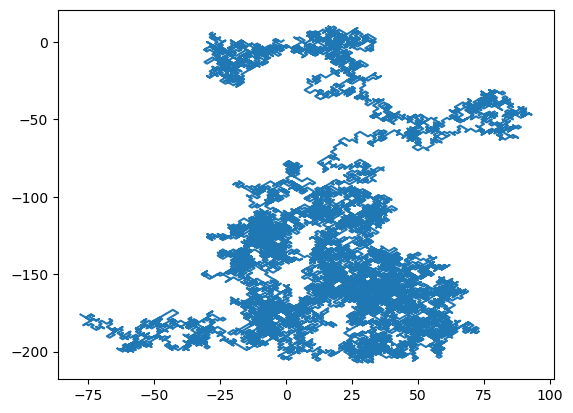

In [18]:
from matplotlib import pyplot as plt

W = rw_d(20000, 2)
plt.plot(W[:,0], W[:,1])

## Problem 2. Reading MIMIC-IV datafile
In this exercise, we explore various tools for ingesting the [MIMIC-IV](https://mimic.mit.edu/docs/iv/) data introduced in BIOSTAT 203B, but we will do it in Python this time.

Let's display the contents of MIMIC `hosp` and `icu` data folders: (if a cell starts with a `!`, the command is run in the shell.)

In [20]:
!ls -l ~/mimic/hosp/

total 8859752
-rw-r--r--@ 1 wang  staff    15516088 Jan 22 15:01 admissions.csv.gz
-rw-r--r--@ 1 wang  staff      427468 Jan 22 15:01 d_hcpcs.csv.gz
-rw-r--r--@ 1 wang  staff      859438 Jan 22 15:01 d_icd_diagnoses.csv.gz
-rw-r--r--@ 1 wang  staff      578517 Jan 22 15:01 d_icd_procedures.csv.gz
-rw-r--r--@ 1 wang  staff       12900 Jan 22 15:01 d_labitems.csv.gz
-rw-r--r--@ 1 wang  staff    25070720 Jan 22 15:01 diagnoses_icd.csv.gz
-rw-r--r--@ 1 wang  staff     7426955 Jan 22 15:01 drgcodes.csv.gz
-rw-r--r--@ 1 wang  staff   508524623 Jan 22 15:01 emar.csv.gz
-rw-r--r--@ 1 wang  staff   471096030 Jan 22 15:01 emar_detail.csv.gz
-rw-r--r--@ 1 wang  staff     1767138 Jan 22 15:01 hcpcsevents.csv.gz
-rw-r--r--@ 1 wang  staff  1939088924 Jan 22 15:01 labevents.csv.gz
-rw-r--r--@ 1 wang  staff    96698496 Jan 22 15:01 microbiologyevents.csv.gz
-rw-r--r--@ 1 wang  staff    36124944 Jan 22 15:01 omr.csv.gz
-rw-r--r--@ 1 wang  staff     2312631 Jan 22 15:01 patients.csv.gz
-rw-r--r--@ 1 wan

In [21]:
!ls -l ~/mimic/icu/

total 6155968
-rw-r--r--@ 1 wang  staff       35893 Jan 22 15:01 caregiver.csv.gz
-rw-r--r--@ 1 wang  staff  2467761053 Jan 22 15:01 chartevents.csv.gz
-rw-r--r--@ 1 wang  staff       57476 Jan 22 15:01 d_items.csv.gz
-rw-r--r--@ 1 wang  staff    45721062 Jan 22 15:01 datetimeevents.csv.gz
-rw-r--r--@ 1 wang  staff     2614571 Jan 22 15:01 icustays.csv.gz
-rw-r--r--@ 1 wang  staff   251962313 Jan 22 15:01 ingredientevents.csv.gz
-rw-r--r--@ 1 wang  staff   324218488 Jan 22 15:01 inputevents.csv.gz
-rw-r--r--@ 1 wang  staff    38747895 Jan 22 15:01 outputevents.csv.gz
-rw-r--r--@ 1 wang  staff    20717852 Jan 22 15:01 procedureevents.csv.gz


### (A). Speed, memory, and data types

Standard way to read a CSV file would be using the `read_csv` function of the `pandas` package. Let us check the speed of reading a moderate-sized compressed csv file, `admissions.csv.gz`. How much memory does the resulting data frame use?

_Note:_ If you start a cell with `%%time`, the runtime will be measured. 

In [22]:
%%time
# your code here
import pandas as pd
file_path = '~/mimic/hosp/admissions.csv.gz'
df = pd.read_csv(file_path)

CPU times: user 695 ms, sys: 177 ms, total: 872 ms
Wall time: 898 ms


In [23]:
print("Memory Usage (in bytes):", df.memory_usage(deep=True).sum())

Memory Usage (in bytes): 368387448


### (B). User-supplied data types

Re-ingest `admissions.csv.gz` by indicating appropriate column data types in [`pd.read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). Does the run time change? How much memory does the result dataframe use? (Hint: `dtype` and `parse_dates` arguments in `pd.read_csv`.)

In [24]:
%%time
dtype_dict = {
    'subject_id': 'int32',
    'hadm_id': 'int32',
    'admittime': 'str',
    'dischtime': 'str',
    'deathtime': 'str',
    'admission_type': 'category',
    'admission_location': 'category',
    'discharge_location': 'category',
    'insurance': 'category',
    'language': 'category',
    'religion': 'category',
    'marital_status': 'category',
    'ethnicity': 'category',
    'edregtime': 'str',
    'edouttime': 'str',
    'diagnosis': 'str',
    'hospital_expire_flag': 'int8',
    'has_chartevents_data': 'int8'
}

# Define which columns should be parsed as dates
date_columns = ['admittime', 'dischtime', 'deathtime', 'edregtime', 'edouttime']

df = pd.read_csv(file_path, dtype=dtype_dict, parse_dates=date_columns)

CPU times: user 827 ms, sys: 72.4 ms, total: 899 ms
Wall time: 915 ms


In [25]:
print("Memory Usage (in bytes):", df.memory_usage(deep=True).sum())

Memory Usage (in bytes): 79744478


## Answer:
The rum time does not change much. However, the memory usage of the dataframe is minimized.

## Problem 3. Ingest big data files


Let us focus on a bigger file, `labevents.csv.gz`, which is about 125x bigger than `admissions.csv.gz`.

In [26]:
!ls -l ~/mimic/hosp/labevents.csv.gz

-rw-r--r--@ 1 wang  staff  1939088924 Jan 22 15:01 /Users/wang/mimic/hosp/labevents.csv.gz


Display the first 10 lines of this file.

In [27]:
!zcat < ~/mimic/hosp/labevents.csv.gz | head -10

labevent_id,subject_id,hadm_id,specimen_id,itemid,order_provider_id,charttime,storetime,value,valuenum,valueuom,ref_range_lower,ref_range_upper,flag,priority,comments
1,10000032,,45421181,51237,P28Z0X,2180-03-23 11:51:00,2180-03-23 15:15:00,1.4,1.4,,0.9,1.1,abnormal,ROUTINE,
2,10000032,,45421181,51274,P28Z0X,2180-03-23 11:51:00,2180-03-23 15:15:00,___,15.1,sec,9.4,12.5,abnormal,ROUTINE,VERIFIED.
3,10000032,,52958335,50853,P28Z0X,2180-03-23 11:51:00,2180-03-25 11:06:00,___,15,ng/mL,30,60,abnormal,ROUTINE,NEW ASSAY IN USE ___: DETECTS D2 AND D3 25-OH ACCURATELY.
4,10000032,,52958335,50861,P28Z0X,2180-03-23 11:51:00,2180-03-23 16:40:00,102,102,IU/L,0,40,abnormal,ROUTINE,
5,10000032,,52958335,50862,P28Z0X,2180-03-23 11:51:00,2180-03-23 16:40:00,3.3,3.3,g/dL,3.5,5.2,abnormal,ROUTINE,
6,10000032,,52958335,50863,P28Z0X,2180-03-23 11:51:00,2180-03-23 16:40:00,109,109,IU/L,35,105,abnormal,ROUTINE,
7,10000032,,52958335,50864,P28Z0X,2180-03-23 11:51:00,2180-03-23 16:40:00,___,8,ng/mL,0,8.7,,ROUTI

### (A). Ingest `labevents.csv.gz` by `pd.read_csv`

Try to ingest `labevents.csv.gz` using `pd.read_csv`. What happens? If it takes more than 5 minutes on your computer, then abort the program and report your findings. 

In [28]:
# labevents_df = pd.read_csv('~/mimic/hosp/labevents.csv.gz')

## Answer:
The ingestion runs longer than 5 minutes, so I abort the program. "pd.read_csv" is not efficient when we try to ingest a much bigger file.

### (B). Ingest selected columns of `labevents.csv.gz` by `pd.read_csv`

Try to ingest only columns `subject_id`, `itemid`, `charttime`, and `valuenum` in `labevents.csv.gz` using `pd.read_csv`.  Does this solve the ingestion issue? (Hint: `usecols` argument in `pd.read_csv`.)

In [29]:
import pandas as pd

# Define the columns we want to read
columns = ['subject_id', 'itemid', 'charttime', 'valuenum']

# Read only the specified columns
labevents_df = pd.read_csv('~/mimic/hosp/labevents.csv.gz', usecols=columns)

In [30]:
labevents_df 

,subject_id,itemid,charttime,valuenum
0,10000032,51237,2180-03-23 11:51:00,1.40
1,10000032,51274,2180-03-23 11:51:00,15.10
2,10000032,50853,2180-03-23 11:51:00,15.00
3,10000032,50861,2180-03-23 11:51:00,102.00
4,10000032,50862,2180-03-23 11:51:00,3.30
...,...,...,...,...
118171362,19999987,51279,2145-11-09 05:30:00,3.52
118171363,19999987,51301,2145-11-09 05:30:00,5.70
118171364,19999987,50912,2146-02-07 11:13:00,1.10
118171365,19999987,50920,2146-02-07 11:13:00,NaN


When specifying the columns to ingest, it works.

### (C). Ingest subset of `labevents.csv.gz`

Back in BIOSTAT 203B, our first strategy to handle this big data file was to make a subset of the `labevents` data.  Read the [MIMIC documentation](https://mimic.mit.edu/docs/iv/modules/hosp/labevents/) for the content in data file `labevents.csv.gz`.

As before, we will only be interested in the following lab items: creatinine (50912), potassium (50971), sodium (50983), chloride (50902), bicarbonate (50882), hematocrit (51221), white blood cell count (51301), and glucose (50931) and the following columns: `subject_id`, `itemid`, `charttime`, `valuenum`. 

Run the Bash command to extract these columns and rows from `labevents.csv.gz` and save the result to a new file `labevents_filtered.csv.gz` in the current working directory (Q2.3 of HW2). How long does it take?
(_Updated 5/6: You may reuse the file you created last quarter and report the elapsed time from the last quarter for this part._)

Display the first 10 lines of the new file `labevents_filtered.csv.gz`. How many lines are in this new file? How long does it take `pd.read_csv()` to ingest `labevents_filtered.csv.gz`?


In [31]:
!zcat < ~/mimic/hosp/labevents.csv.gz | awk -F, 'BEGIN{OFS=","} {if ($5 == 50912 || $5 == 50971 || $5 == 50983 || $5 == 50902 || $5 == 50882 || $5 == 51221 || $5 == 51301 || $5 == 50931) print $2,$5,$7,$10}' | gzip > labevents_filtered.csv.gz

In [32]:
!zcat < labevents_filtered.csv.gz | head -10

10000032,50882,2180-03-23 11:51:00,27
10000032,50902,2180-03-23 11:51:00,101
10000032,50912,2180-03-23 11:51:00,0.4
10000032,50971,2180-03-23 11:51:00,3.7
10000032,50983,2180-03-23 11:51:00,136
10000032,50931,2180-03-23 11:51:00,95
10000032,51221,2180-03-23 11:51:00,45.4
10000032,51301,2180-03-23 11:51:00,3
10000032,51221,2180-05-06 22:25:00,42.6
10000032,51301,2180-05-06 22:25:00,5
zcat: error writing to output: Broken pipe


In [33]:
!zcat < labevents_filtered.csv.gz | wc -l

 24855909


In [34]:
%%time
df = pd.read_csv("labevents_filtered.csv.gz")

CPU times: user 5.45 s, sys: 688 ms, total: 6.14 s
Wall time: 6.42 s


## Answer:
There are 24855909 lines in this new file. It takes 6.38s to ingest.

### (D). Review

Write several sentences on what Apache Arrow, the Parquet format, and DuckDB are. Imagine you want to explain it to a layman in an elevator, as you did before. (It's OK to copy-paste the sentences from your previous submission.)

Also, now is the good time to review [basic SQL commands](https://ucla-biostat-203b.github.io/2024winter/slides/12-dbplyr/dbintro.html) covered in BIOSTAT 203B.

## Answer:
Apache Arrow is a platform to transform data among various database or language data formats using its in-memory columnar format. It is like a bridge between different data formats, and It can lower the time cost as much as possible.

Parquet is a data file format to store and retrieve data in an efficient way using column-oriented method. It is like a data warehouse, and it can lower the time cost and file size as much as possible.

DuckDB is basically an online analytical processing database. It leverages Structured Query Language (SQL) to analyze data fastly.

### (E). Ingest `labevents.csv.gz` by Apache Arrow (modified 5/6)

Our second strategy again is to use [Apache Arrow](https://arrow.apache.org/) for larger-than-memory data analytics. We will use the package `pyarrow`. Unlike in R, this package works with the `csv.gz` format. We don't need to keep the decompressed data on disk. We could just use `dplyr` verbs in R, but here, we need a different set of commands. The core idea behind the commands are still similar, though. There is one notable difference in approach: 

- R's `arrow` package allowed lazy evaluation but required `csv` file to be decompressed beforehand. 
- On the other hand, `pyarrow` allows `csv.gz` format, but lazy evaluation is not available. For larger-than-memory data, streaming approach can be used.

Follow these steps to ingest the data:
- Use [`pyarrow.csv.read_csv`](https://arrow.apache.org/docs/python/generated/pyarrow.csv.read_csv.html) to read in `labevents.csv.gz`. It creates an object of type [`pyarrow.Table`](https://arrow.apache.org/docs/python/generated/pyarrow.Table.html). _If this does not work on your computer, state that fact. It's OK to not complete this part in that case. However, you still need the `filter_table()` function for the next part. It's still recommend to _

- Define a function `filter_table()` that takes in a `pyarrow.Table` as an argument, and returns `pyarrow.Table` doing the following:
    - Select columns using the [`.select()`](https://arrow.apache.org/docs/python/generated/pyarrow.Table.html#pyarrow.Table.select) method. 
    - Filter the rows based on the column `itemid` using the [`.filter()`](https://arrow.apache.org/docs/python/generated/pyarrow.Table.html#pyarrow.Table.filter) method. You should use [`Expression`](https://arrow.apache.org/docs/python/generated/pyarrow.dataset.Expression) for improved performance. In particular, use the `isin()` method for constructing it.
    
- Finally, let's obtain the result in `pandas` `DataFrame` using the method `.to_pandas()`. 

How long does the ingest+select+filter process take? Display the number of rows and the first 10 rows of the result dataframe, and make sure they match those of (C).


In [1]:
import pyarrow.csv as pc
import pyarrow as pa
import pandas as pd

In [2]:
# Define the filter_table function
def filter_table(table):
    # Selecting columns
    table = table.select(['subject_id', 'itemid', 'charttime', 'valuenum'])

    # Filtering rows based on itemid
    item_ids = pa.array([50912, 50971, 50983, 50902, 50882, 51221, 51301, 50931])
    expression = pa.compute.is_in(table['itemid'], value_set=item_ids)
    filtered_table = table.filter(expression)

    return filtered_table

In [ ]:
# %%time

# # Define the path to the CSV file
# csv_path = '~/mimic/hosp/labevents.csv.gz'

# # Read the CSV file using PyArrow
# table = pc.read_csv(csv_path)

# # Applying the filtering function
# filtered_table = filter_table(table)

# # Convert to Pandas DataFrame
# df = filtered_table.to_pandas()
# print(df.head())

It does not work on my computer.

### (F). Streaming data (added 5/6)

When working with the `csv.gz` file, the entire file will need to be decompressed in memory, which might not be feasible. You can stream data, and processing them in several chunks that fits into the memory.

If the function `filter_table()` is defined correctly, the following should successfully ingest the data. Discuss what this code is doing in markdown. Also, add sufficient comment to the code. 

In [33]:
%%time
# The code for this part is given directly for you. 
# Discuss what this code is doing in text and using comment.
import pyarrow as pa
import pyarrow.parquet as pq
import pyarrow.csv

# Define the path to the compressed CSV file.
in_path = '~/mimic/hosp/labevents.csv.gz'

# Initialize a variable to hold the filtered data.
filtered = None

# Use PyArrow to open the CSV file. The 'open_csv' function returns a reader object 
# that allows streaming the file content.
with pyarrow.csv.open_csv(in_path) as reader:
    # Iterate over the file in chunks. Each chunk is read as needed, reducing memory usage.
    for next_chunk in reader:
        # If no more data is available, exit the loop.
        if next_chunk is None:
            break
        # Convert the chunk to a PyArrow Table. This is necessary to use PyArrow's data filtering functions.
        next_table = pa.Table.from_batches([next_chunk])
        # Apply the filter_table function to extract relevant data from the current chunk.
        next_subset = filter_table(next_table)
        # If this is the first chunk being processed, initialize 'filtered' with it.
        if filtered is None:
            filtered = next_subset
        else:
            # If 'filtered' already contains data, concatenate the new subset to it.
            filtered = pa.concat_tables([filtered,
                                      next_subset])
# Once all chunks have been processed and concatenated, convert the final PyArrow Table to a Pandas DataFrame.
filtered_df = filtered.to_pandas()

CPU times: user 1min 22s, sys: 2.21 s, total: 1min 24s
Wall time: 1min 7s


### (G). Convert `labevents.csv.gz` to Parquet format and ingest/select/filter

Re-write the csv.gz file `labevents.csv.gz` in the binary Parquet format using the code below. Add comments to the code. How large is the Parquet file(s)?

In [23]:
%%time

import pyarrow.parquet as pq
import pyarrow.compute as pc
import pyarrow as pa
# The code for this part is given directly for you. 
# Add comments.

# Define the path to the input CSV file and the output Parquet file.
in_path = '~/mimic/hosp/labevents.csv.gz'
out_path = 'labevents.parquet'

# Initialize a variable to hold the Parquet writer object.
writer = None

# Open the CSV file for reading. This method allows processing the file in chunks.
with pyarrow.csv.open_csv(in_path) as reader:
    # Iterate over chunks of the CSV file.
    for next_chunk in reader:
        # Break the loop if no more data is available (end of file).
        if next_chunk is None:
            break
        # Initialize the Parquet writer with the schema of the first chunk if it hasn't been initialized.
        if writer is None:
            writer = pq.ParquetWriter(out_path, next_chunk.schema)
        # Convert the current chunk into a PyArrow Table.
        next_table = pa.Table.from_batches([next_chunk])
        # Write the Table to the Parquet file.
        writer.write_table(next_table)
# Ensure to close the Parquet writer to finalize the file and free resources.
writer.close()

CPU times: user 1min 54s, sys: 3.26 s, total: 1min 57s
Wall time: 1min 40s


How long does the ingest+select+filter process of the Parquet file(s) take? 
Display the number of rows and the first 10 rows of the result dataframe and make sure they match those in Part (C). 

__This should be significantly faster than all the previous results.__ 
_Hint._ Use [`pyarrow.parquet.read_table`](https://arrow.apache.org/docs/python/generated/pyarrow.parquet.read_table.html) method with the keyword argument `columns`. Also, make sure that you are using an `Expression` for the filtering step. 

In [24]:
%%time

# Define the path to the Parquet file
parquet_path = 'labevents.parquet'

# Specify the columns of interest
columns_of_interest = ['subject_id', 'itemid', 'charttime', 'valuenum']

# Define the lab items of interest as in Part (C)
lab_items = [50912, 50971, 50983, 50902, 50882, 51221, 51301, 50931]

# Read the Parquet file filtering the necessary columns and rows
table = pq.read_table(parquet_path, columns=columns_of_interest)

# Define filter expression using the is_in() function and SetLookupOptions for better performance
filter_expression = pc.is_in(table['itemid'], value_set=pa.array(lab_items))

# Filter the table based on the itemid column
filtered_table = table.filter(filter_expression)

# Convert to Pandas DataFrame
df = filtered_table.to_pandas()

CPU times: user 4.61 s, sys: 5.06 s, total: 9.67 s
Wall time: 15.3 s


In [25]:
print(df.shape[0])
print(df.head(10))

24855909
   subject_id  itemid           charttime  valuenum
0    10000032   50882 2180-03-23 11:51:00      27.0
1    10000032   50902 2180-03-23 11:51:00     101.0
2    10000032   50912 2180-03-23 11:51:00       0.4
3    10000032   50971 2180-03-23 11:51:00       3.7
4    10000032   50983 2180-03-23 11:51:00     136.0
5    10000032   50931 2180-03-23 11:51:00      95.0
6    10000032   51221 2180-03-23 11:51:00      45.4
7    10000032   51301 2180-03-23 11:51:00       3.0
8    10000032   51221 2180-05-06 22:25:00      42.6
9    10000032   51301 2180-05-06 22:25:00       5.0


It takes 9.67s for ingest+select+filter process. There are 24855909 rows and both the number of rows and the first 10 rows are the same with part(C).

### (H). DuckDB

Let's use `duckdb` package in Python to use the DuckDB interface. In Python, DuckDB can interact smoothly with `pandas` and `pyarrow`. I recommend reading: 

- https://duckdb.org/2021/05/14/sql-on-pandas.html
- https://duckdb.org/docs/guides/python/sql_on_arrow.html

In Python, you will mostly use SQL commands to work with DuckDB. Check out the [data ingestion API](https://duckdb.org/docs/api/python/data_ingestion).


Ingest the Parquet file, select columns, and filter rows as in (F). How long does the ingest+select+filter process take? Please make sure to call `.df()` method to have the final result as a `pandas` `DataFrame`. Display the number of rows and the first 10 rows of the result dataframe and make sure they match those in (C). 

__This should be significantly faster than the results before (but not including) Part (F).__ 
_Hint_: It could be a single SQL command.


In [31]:
%%time
import duckdb
import pandas as pd

# Define the path to the Parquet file
parquet_path = 'labevents.parquet'

# Connect to DuckDB
con = duckdb.connect()

# Define the SQL query
query = """
SELECT subject_id, itemid, charttime, valuenum
FROM read_parquet('labevents.parquet')
WHERE itemid IN (50912, 50971, 50983, 50902, 50882, 51221, 51301, 50931)
"""

# Execute the query and get the result as a pandas DataFrame
df = con.execute(query).df()

# Display the number of rows
print("Number of rows:", len(df))

# Display the first 10 rows
print(df.head(10))

# Close the DuckDB connection
con.close()


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

Number of rows: 24855909
   subject_id  itemid           charttime  valuenum
0    10000032   50882 2180-03-23 11:51:00      27.0
1    10000032   50902 2180-03-23 11:51:00     101.0
2    10000032   50912 2180-03-23 11:51:00       0.4
3    10000032   50971 2180-03-23 11:51:00       3.7
4    10000032   50983 2180-03-23 11:51:00     136.0
5    10000032   50931 2180-03-23 11:51:00      95.0
6    10000032   51221 2180-03-23 11:51:00      45.4
7    10000032   51301 2180-03-23 11:51:00       3.0
8    10000032   51221 2180-05-06 22:25:00      42.6
9    10000032   51301 2180-05-06 22:25:00       5.0
CPU times: user 6.09 s, sys: 3.99 s, total: 10.1 s
Wall time: 6.88 s


It takes 10.1s for ingest+select+filter process. The first 10 rows are the same with part(C).

### (I). Comparison (added 5/6)
Compare your results with those from Homework 2 of BIOSTAT 203B. 

## Answer:
The result of first 10 rows are exactly the same with Homework 2 of BIOSTAT 203B.

## Problem 4. Ingest and filter `chartevents.csv.gz`

[`chartevents.csv.gz`](https://mimic.mit.edu/docs/iv/modules/icu/chartevents/) contains all the charted data available for a patient. During their ICU stay, the primary repository of a patient’s information is their electronic chart. The `itemid` variable indicates a single measurement type in the database. The `value` variable is the value measured for `itemid`. The first 10 lines of `chartevents.csv.gz` are


In [1]:
!zcat < ~/mimic/icu/chartevents.csv.gz | head -10

subject_id,hadm_id,stay_id,caregiver_id,charttime,storetime,itemid,value,valuenum,valueuom,warning
10000032,29079034,39553978,47007,2180-07-23 21:01:00,2180-07-23 22:15:00,220179,82,82,mmHg,0
10000032,29079034,39553978,47007,2180-07-23 21:01:00,2180-07-23 22:15:00,220180,59,59,mmHg,0
10000032,29079034,39553978,47007,2180-07-23 21:01:00,2180-07-23 22:15:00,220181,63,63,mmHg,0
10000032,29079034,39553978,47007,2180-07-23 22:00:00,2180-07-23 22:15:00,220045,94,94,bpm,0
10000032,29079034,39553978,47007,2180-07-23 22:00:00,2180-07-23 22:15:00,220179,85,85,mmHg,0
10000032,29079034,39553978,47007,2180-07-23 22:00:00,2180-07-23 22:15:00,220180,55,55,mmHg,0
10000032,29079034,39553978,47007,2180-07-23 22:00:00,2180-07-23 22:15:00,220181,62,62,mmHg,0
10000032,29079034,39553978,47007,2180-07-23 22:00:00,2180-07-23 22:15:00,220210,20,20,insp/min,0
10000032,29079034,39553978,47007,2180-07-23 22:00:00,2180-07-23 22:15:00,220277,95,95,%,0
zcat: error writing to output: Broken pipe


[`d_items.csv.gz`](https://mimic.mit.edu/docs/iv/modules/icu/d_items/) is the dictionary for the `itemid` in `chartevents.csv.gz`.

In [2]:
!zcat < ~/mimic/icu/d_items.csv.gz | head -10

itemid,label,abbreviation,linksto,category,unitname,param_type,lownormalvalue,highnormalvalue
220001,Problem List,Problem List,chartevents,General,,Text,,
220003,ICU Admission date,ICU Admission date,datetimeevents,ADT,,Date and time,,
220045,Heart Rate,HR,chartevents,Routine Vital Signs,bpm,Numeric,,
220046,Heart rate Alarm - High,HR Alarm - High,chartevents,Alarms,bpm,Numeric,,
220047,Heart Rate Alarm - Low,HR Alarm - Low,chartevents,Alarms,bpm,Numeric,,
220048,Heart Rhythm,Heart Rhythm,chartevents,Routine Vital Signs,,Text,,
220050,Arterial Blood Pressure systolic,ABPs,chartevents,Routine Vital Signs,mmHg,Numeric,90,140
220051,Arterial Blood Pressure diastolic,ABPd,chartevents,Routine Vital Signs,mmHg,Numeric,60,90
220052,Arterial Blood Pressure mean,ABPm,chartevents,Routine Vital Signs,mmHg,Numeric,,
zcat: error writing to output: Broken pipe


Again, we are interested in the vitals for ICU patients: heart rate (220045), mean non-invasive blood pressure (220181), systolic non-invasive blood pressure (220179), body temperature in Fahrenheit (223761), and respiratory rate (220210). Retrieve a subset of `chartevents.csv.gz` only containing these items, using the favorite method you learnt in Problem 3. 

Document the steps and show your code. Display the number of rows and the first 10 rows of the result `DataFrame`.

In [4]:
import duckdb
# Define the path to the CSV file
csv_path = '~/mimic/icu/chartevents.csv.gz'

# Initialize a DuckDB connection
con = duckdb.connect()

# Use DuckDB to read and filter the CSV file directly
vitals_itemids = [220045, 220179, 220181, 223761, 220210]
query = f"""
SELECT subject_id, hadm_id, stay_id, itemid, charttime, value, valuenum
FROM read_csv_auto('{csv_path}')
WHERE itemid IN {tuple(vitals_itemids)}
"""

# Execute the query and load the results into a pandas DataFrame
df = con.execute(query).df()

# Close the DuckDB connection
con.close()

# Display the first 10 rows
print(df.head(10))

# Print the number of rows
print("Number of rows:", len(df))





FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

   subject_id   hadm_id   stay_id  itemid           charttime value  valuenum
0    10000032  29079034  39553978  220179 2180-07-23 21:01:00    82      82.0
1    10000032  29079034  39553978  220181 2180-07-23 21:01:00    63      63.0
2    10000032  29079034  39553978  220045 2180-07-23 22:00:00    94      94.0
3    10000032  29079034  39553978  220179 2180-07-23 22:00:00    85      85.0
4    10000032  29079034  39553978  220181 2180-07-23 22:00:00    62      62.0
5    10000032  29079034  39553978  220210 2180-07-23 22:00:00    20      20.0
6    10000032  29079034  39553978  220045 2180-07-23 19:00:00    97      97.0
7    10000032  29079034  39553978  220179 2180-07-23 19:00:00    93      93.0
8    10000032  29079034  39553978  220181 2180-07-23 19:00:00    56      56.0
9    10000032  29079034  39553978  220210 2180-07-23 19:00:00    16      16.0
Number of rows: 22502319
